### Урок 1. Введение в PyTorch#

### -- Автор: Шенк Евгений Станиславович

### Задание 1.

Добиться вразумительного результата от модели, собранной на занятии (3 угаданные картинки из 4 предложенных на семинаре).   
Варианты изменений:  
- изменение слоёв и их количества;  
- изменение метода оптимизации;   
- изменение процесса обучения;   
- для продвинутых: преобразование данных.  

In [1]:
import torch
import torchvision
import numpy as np
from torch import nn 
from torch import optim
from torch.autograd import Variable
import torchvision.transforms as transforms
import matplotlib.pyplot as plt ### воспользуемся для отображения изображения

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [3]:
train_dataset = torchvision.datasets.CIFAR10(root='../../data/',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=False)


image, label = train_dataset[0]
print (image.size())
print (label)

torch.Size([3, 32, 32])
6


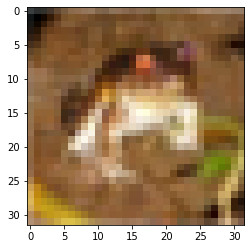

In [4]:
plt.imshow(image.permute(1, 2, 0).numpy())

In [5]:
# Loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=128, 
                                           shuffle=True)

In [6]:
# Train-test
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8,
                                         shuffle=False)

Files already downloaded and verified


In [7]:
classes = ('plane', 'car', 'bird', 'cat',  'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

#### Model

In [8]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.pool = nn.AvgPool2d(2, 2)
        self.drop = torch.nn.Dropout(p=0.2)
        self.conv1 = nn.Conv2d(3, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(16 * 13 * 13, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = x.view(-1, 16 * 13 * 13)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.softmax(self.fc4(x))
        return x


net = Net().to('cpu')

In [9]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(params=net.parameters(), lr=0.0005, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
N_epoches = 3

In [10]:
for epoch in range(N_epoches):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 50 == 0:    # печатаем каждые 500 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

C:\Users\Eugene\anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


[1,     1] loss: 0.001
[1,    51] loss: 0.057
[1,   101] loss: 0.055
[1,   151] loss: 0.054
[1,   201] loss: 0.054
[1,   251] loss: 0.053
[1,   301] loss: 0.053
[1,   351] loss: 0.053
[2,     1] loss: 0.001
[2,    51] loss: 0.053
[2,   101] loss: 0.052
[2,   151] loss: 0.052
[2,   201] loss: 0.052
[2,   251] loss: 0.052
[2,   301] loss: 0.052
[2,   351] loss: 0.052
[3,     1] loss: 0.001
[3,    51] loss: 0.051
[3,   101] loss: 0.051
[3,   151] loss: 0.051
[3,   201] loss: 0.051
[3,   251] loss: 0.051
[3,   301] loss: 0.051
[3,   351] loss: 0.050
Training is finished!


### Результат

In [11]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog


C:\Users\Eugene\anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


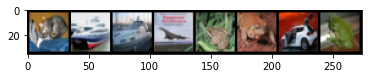

In [12]:
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))

In [13]:
# Предсказание
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(8)))

Predicted:    cat  ship  ship plane  frog  frog   cat  frog


### Задание 2.

Взять часть, где мы делали один шаг обучения, и обернуть его в цикл по схеме, как обучали модель в конце занятия.

In [14]:
linear = nn.Linear(2, 2)

In [15]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

In [16]:
x = Variable(torch.randn(2), requires_grad = True)
y = Variable(torch.randn(2), requires_grad = False)

In [17]:
N_epoches = 50

In [18]:
for epoch in range(N_epoches):  
    
    # обнуляем градиент
    optimizer.zero_grad()

    pred = linear(x)
    loss = criterion(pred, y)
    loss.backward()
    optimizer.step()

    # выводим статистику о процессе обучения
    if (epoch % 5) == 0:
        print('[%d] loss: %.3f' %(epoch + 1, loss.item()))

print('Training is finished!')

[1] loss: 0.598
[6] loss: 0.442
[11] loss: 0.327
[16] loss: 0.242
[21] loss: 0.179
[26] loss: 0.133
[31] loss: 0.098
[36] loss: 0.073
[41] loss: 0.054
[46] loss: 0.040
Training is finished!


In [19]:
x

tensor([ 0.4954, -1.3103], requires_grad=True)

In [20]:
y

tensor([ 0.0688, -0.6397])

In [21]:
pred

tensor([ 0.1492, -0.4024], grad_fn=<AddBackward0>)

### Задание 3.

Переписать эту программу на PyTorch:

In [22]:
import tensorflow as tf

In [23]:
model = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(input_shape=(28, 28)),
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [24]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.drop = torch.nn.Dropout(p=0.2)
        self.flat = torch.nn.Flatten(start_dim=0, end_dim = 1)
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flat(x)
        x = F.relu(self.fc1(x))
        x = self.drop(x)
        x = F.softmax(self.fc2(x))
        x = x.reshape(1, 10)

        return x

net = Net().to('cpu')

In [25]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(params=net.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

In [26]:
N_epoches = 5
inputs = torch.randn(28, 28)
label = torch.LongTensor([3])

In [27]:
for epoch in range(N_epoches):  
    running_loss = 0.0

    # обнуляем градиент
    optimizer.zero_grad()

    output = net(inputs)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()

    # выводим статистику о процессе обучения
    if epoch % 1 == 0:
        print('[%d] loss: %.3f' %(epoch + 1, loss.item()))

print('Training is finished!')

[1] loss: 2.264
[2] loss: 2.049
[3] loss: 1.712
[4] loss: 1.517
[5] loss: 1.494
Training is finished!


C:\Users\Eugene\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


In [28]:
output

tensor([[1.7940e-03, 8.4133e-03, 6.4474e-04, 9.6205e-01, 1.8815e-03, 2.9425e-03,
         1.3145e-03, 5.7042e-03, 5.3929e-03, 9.8651e-03]],
       grad_fn=<ViewBackward>)